In [1]:
import pandas as pd
import numpy as np

In [2]:
train_file_path = 'Dataset/Train.csv'
test_file_path = 'Dataset/Test.csv'

In [3]:
train_df = pd.read_csv(train_file_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Employee_ID                  7000 non-null object
Gender                       7000 non-null object
Age                          6588 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              6856 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    6991 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            6989 non-null float64
VAR1                         7000 non-null int64
VAR2                         6423 non-null fl

In [4]:
train_df.isna().sum(0)

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [7]:
train_df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [8]:
catgorical_part = train_df.select_dtypes(include='object')
catgorical_part

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3
...,...,...,...,...,...,...,...
6995,EID_16328,F,Married,Franklin,Operarions,Behavioral,type3
6996,EID_8387,F,Married,Lebanon,R&D,Analytical,type3
6997,EID_8077,F,Single,Springfield,IT,Directive,type2
6998,EID_19597,F,Married,Washington,Sales,Behavioral,type0


In [10]:
catgorical_part.isna().sum()

Employee_ID                  0
Gender                       0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Compensation_and_Benefits    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
for col in catgorical_part.columns:
    catgorical_part[col] = LabelEncoder().fit_transform(catgorical_part[col])
catgorical_part

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,4143,0,0,1,2,2,2
1,2500,1,1,3,3,0,2
2,5312,0,0,0,8,2,2
3,2339,0,1,2,1,1,2
4,3885,0,0,3,3,2,3
...,...,...,...,...,...,...,...
6995,1990,0,0,1,5,1,3
6996,6560,0,0,2,9,0,3
6997,6472,0,1,3,2,3,2
6998,3018,0,0,4,10,1,0


In [12]:
catgorical_part = catgorical_part.drop(['Employee_ID'], axis=1)

In [13]:
catgorical_part

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0,0,1,2,2,2
1,1,1,3,3,0,2
2,0,0,0,8,2,2
3,0,1,2,1,1,2
4,0,0,3,3,2,3
...,...,...,...,...,...,...
6995,0,0,1,5,1,3
6996,0,0,2,9,0,3
6997,0,1,3,2,3,2
6998,0,0,4,10,1,0


In [50]:
numerical_part = train_df.select_dtypes(exclude='object')
numerical_part

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23.0,5,4.0,1,20,1,2,6.0,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,44.0,1,16.0,2,59,0,2,4.0,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,49.0,3,10.0,1,59,1,2,3.0,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,47.0,3,24.0,1,21,1,5,8.0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [53]:
numerical_part = numerical_part.fillna(0)

In [55]:
for col in numerical_part.columns:
    if numerical_part[col].isna().sum() != 0:
        print(numerical_part[col].mean())
        numerical_part[col] = (numerical_part[col] - numerical_part[col].mean())/(numerical_part[col].max() - numerical_part[col].min())
numerical_part.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,37.290714,3.187857,13.109714,2.367143,47.064286,0.817857,2.798000,5.998571,2.384143,3.098571,-0.007456,-0.013606,1.713857,2.834143,7.101286,3.257000,0.189376
std,16.162517,1.065102,10.431522,1.149395,15.761406,0.648205,1.163721,2.068342,1.125884,0.836377,0.948173,0.986933,0.746842,0.938945,1.164262,0.925319,0.185753
min,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.817600,-2.776200,0.000000,1.000000,5.000000,1.000000,0.000000
25%,26.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,1.000000,2.000000,6.000000,3.000000,0.070400
50%,36.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,0.000000,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [52]:
numerical_part.isna().sum()

Age                     412
Education_Level           0
Time_of_service         144
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                 9
Work_Life_balance        11
VAR1                      0
VAR2                    577
VAR3                      0
VAR4                    656
VAR5                      0
VAR6                      0
VAR7                      0
Attrition_rate            0
dtype: int64

In [56]:
final_features = pd.concat([numerical_part, catgorical_part], axis=1)

In [57]:
final_features

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,VAR5,VAR6,VAR7,Attrition_rate,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,...,4,5,3,0.1841,0,0,1,2,2,2
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,...,3,5,3,0.0670,1,1,3,3,0,2
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,...,3,8,3,0.0851,0,0,0,8,2,2
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,...,3,7,3,0.0668,0,1,2,1,1,2
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,...,2,8,2,0.1827,0,0,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23.0,5,4.0,1,20,1,2,6.0,3.0,1,...,3,7,3,0.7839,0,0,1,5,1,3
6996,44.0,1,16.0,2,59,0,2,4.0,3.0,2,...,4,8,4,0.1055,0,0,2,9,0,3
6997,49.0,3,10.0,1,59,1,2,3.0,4.0,2,...,4,8,3,0.7847,0,1,3,2,3,2
6998,47.0,3,24.0,1,21,1,5,8.0,2.0,4,...,3,6,3,0.4162,0,0,4,10,1,0


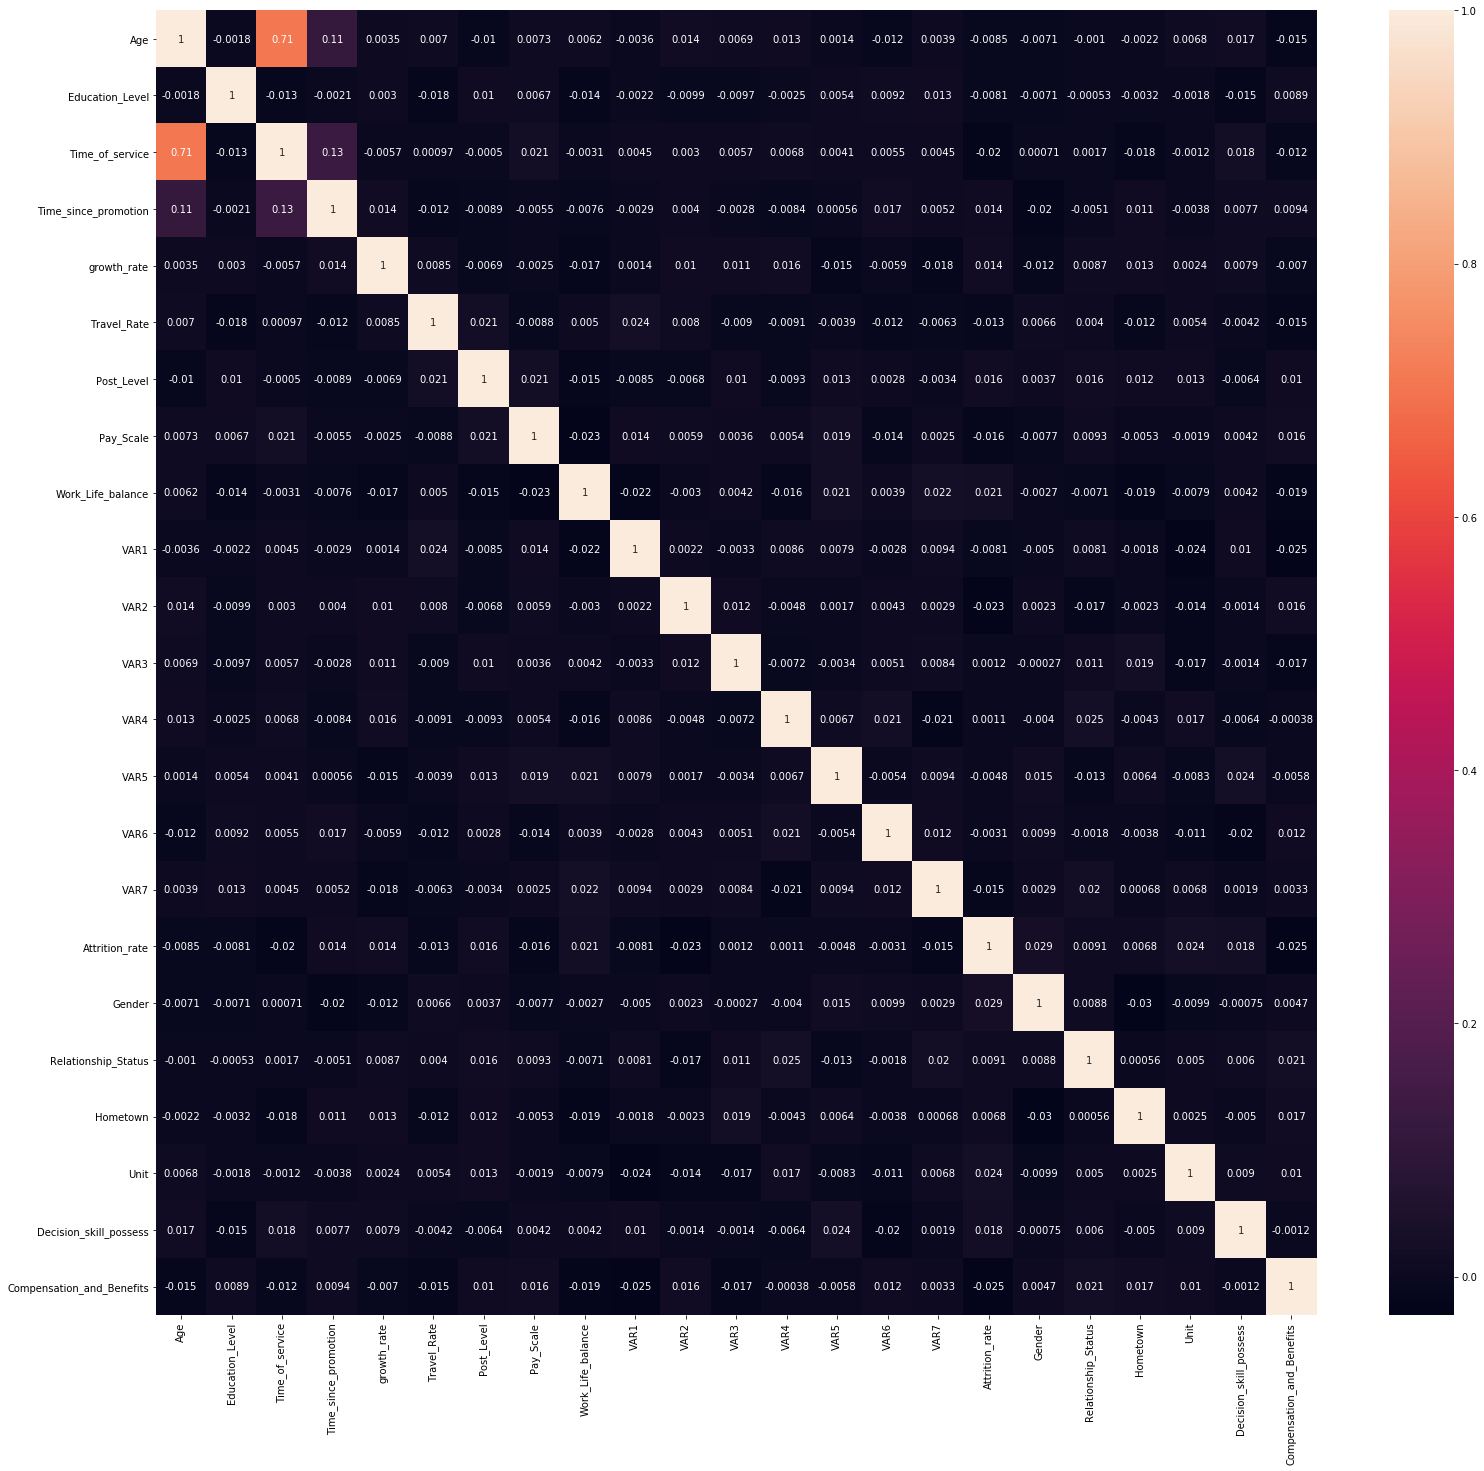

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(26, 24))
sns.heatmap(final_features.corr(), annot=True)
plt.show()

In [62]:
final_features

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,VAR5,VAR6,VAR7,Attrition_rate,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,...,4,5,3,0.1841,0,0,1,2,2,2
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,...,3,5,3,0.0670,1,1,3,3,0,2
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,...,3,8,3,0.0851,0,0,0,8,2,2
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,...,3,7,3,0.0668,0,1,2,1,1,2
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,...,2,8,2,0.1827,0,0,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23.0,5,4.0,1,20,1,2,6.0,3.0,1,...,3,7,3,0.7839,0,0,1,5,1,3
6996,44.0,1,16.0,2,59,0,2,4.0,3.0,2,...,4,8,4,0.1055,0,0,2,9,0,3
6997,49.0,3,10.0,1,59,1,2,3.0,4.0,2,...,4,8,3,0.7847,0,1,3,2,3,2
6998,47.0,3,24.0,1,21,1,5,8.0,2.0,4,...,3,6,3,0.4162,0,0,4,10,1,0


In [72]:
test_df = pd.read_csv(test_file_path)
test_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [78]:
test_df = test_df.fillna(0)

In [79]:
test_df.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [80]:
test_features = test_df.drop(['Employee_ID'], axis=1)
test_features

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,38,...,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,F,0.0,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,...,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,...,9.0,type3,3.0,3,-1.8176,-0.4537,0.0,4,8,4
2998,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,30,...,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [82]:
for col in test_features.columns:
    if test_features[col].dtype=='object':
        test_features[col] = LabelEncoder().fit_transform(test_features[col])
        
test_features

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,32.0,5,1,3,9,2,7.0,4,30,...,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,1,65.0,2,1,2,2,3,41.0,2,72,...,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,1,52.0,3,0,3,10,3,21.0,3,25,...,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,1,50.0,5,1,4,4,0,11.0,4,28,...,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,0,44.0,3,0,1,9,2,12.0,4,47,...,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,32.0,3,1,1,10,3,3.0,3,38,...,6.0,2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,0,0.0,2,1,1,4,2,10.0,2,57,...,9.0,2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,0,60.0,4,1,2,3,0,35.0,1,69,...,9.0,3,3.0,3,-1.8176,-0.4537,0.0,4,8,4
2998,0,51.0,1,0,3,2,1,23.0,1,30,...,6.0,3,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [83]:
final_test_features = StandardScaler().fit_transform(test_features)

In [84]:
final_test_features

array([[-0.85796918, -0.35604259,  1.66427922, ..., -1.95213279,
         0.75447116,  0.84998385],
       [ 1.16554303,  1.71909086, -1.15070161, ..., -0.88907264,
         0.75447116, -1.3644769 ],
       [ 1.16554303,  0.90161404, -0.21237467, ..., -1.95213279,
         1.62201178, -0.25724652],
       ...,
       [-0.85796918,  1.4046767 ,  0.72595228, ...,  1.23704766,
         0.75447116,  0.84998385],
       [-0.85796918,  0.83873121, -2.08902855, ...,  0.17398751,
         1.62201178, -1.3644769 ],
       [-0.85796918,  0.46143422, -2.08902855, ..., -0.88907264,
         0.75447116,  1.95721423]])

In [94]:
answer = model.predict(test_features)

In [173]:
ftf

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,VAR4,VAR5,VAR6,VAR7,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,...,2.0,1,8,4,0,1,3,9,2,2
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,...,1.0,2,8,2,1,1,2,2,3,2
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,...,2.0,1,9,3,1,0,3,10,3,3
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,...,2.0,2,8,3,1,1,4,4,0,0
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,...,2.0,2,7,4,0,0,1,9,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,32.0,3,3.0,3,38,1,3,6.0,2.0,1,...,1.0,4,7,4,0,1,1,10,3,2
2996,0.0,2,10.0,2,57,1,4,9.0,1.0,3,...,3.0,4,8,3,0,1,1,4,2,2
2997,60.0,4,35.0,1,69,0,2,9.0,3.0,3,...,0.0,4,8,4,0,1,2,3,0,3
2998,51.0,1,23.0,1,30,0,2,6.0,1.0,5,...,2.0,3,9,2,0,0,3,2,1,3


In [177]:
Submission = pd.DataFrame()
Submission['Employee_ID'] = test_df['Employee_ID']
Submission['Attrition_rate'] = model3.predict(ftf)
Submission

,Employee_ID,Attrition_rate
0,EID_22713,0.189376
1,EID_9658,0.189376
2,EID_22203,0.189376
3,EID_7652,0.189376
4,EID_6516,0.189376
...,...,...
2995,EID_22547,0.189376
2996,EID_10066,0.189376
2997,EID_7126,0.189376
2998,EID_4929,0.189376


In [178]:
Submission.Attrition_rate.mean()

0.18937143683433533

In [179]:
train_df.Attrition_rate.mean()

0.1893761285714282

In [180]:
Submission.to_csv('ans.csv', index=False)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_features.drop(['Attrition_rate'], axis=1), final_features['Attrition_rate'], test_size=0.15, random_state=42)

In [99]:
import xgboost as xgb
from bayes_opt import BayesianOptimization

dtrain = xgb.DMatrix(final_features.drop(['Attrition_rate'], axis=1), final_features['Attrition_rate'])

In [117]:
import warnings
warnings.simplefilter("ignore")

In [120]:
#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma,learning_rate):
    
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
    cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth |
-------------------------------------------------------------
|  1        | -0.1863   |  0.339    |  0.2911   |  3.186    |
|  2        | -0.1916   |  0.1579   |  0.1996   |  5.582    |
|  3        | -0.2003   |  0.08816  |  0.4572   |  4.119    |
|  4        | -0.1901   |  0.7677   |  0.8055   |  6.612    |
|  5        | -0.229    |  0.01751  |  0.601    |  7.51     |
|  6        | -0.2335   |  0.1106   |  0.7663   |  8.803    |
|  7        | -0.1857   |  0.9749   |  0.6219   |  3.203    |
|  8        | -0.1882   |  0.7576   |  0.3867   |  9.633    |
|  9        | -0.3619   |  1.0      |  0.0      |  5.089    |
|  10       | -0.2097   |  0.0      |  1.0      |  3.0      |
|  11       | -0.1898   |  1.0      |  1.0      |  10.0     |
|  12       | -0.2553   |  0.0      |  1.0      |  5.82     |
|  13       | -0.1881   |  1.0      |  1.0      |  8.331    |


In [121]:
params = xgb_bo.max['params']
print(params)

{'gamma': 0.9748568641570245, 'learning_rate': 0.6219451674572678, 'max_depth': 3.2034818120440827}


In [122]:
params['max_depth']= int(params['max_depth'])

In [124]:
xgbreg = xgb.XGBRegressor(**params).fit(final_features.drop(['Attrition_rate'], axis=1), final_features['Attrition_rate'])

In [125]:
xgbreg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.9748568641570245,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.6219451674572678, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [144]:
xgbreg.predict(ftf)

array([0.18937615, 0.18937615, 0.18937615, ..., 0.18937615, 0.18937615,
       0.18937615], dtype=float32)

In [132]:
cat_test = test_features[['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']]
cat_test

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0,1,3,9,2,2
1,1,1,2,2,3,2
2,1,0,3,10,3,3
3,1,1,4,4,0,0
4,0,0,1,9,2,2
...,...,...,...,...,...,...
2995,0,1,1,10,3,2
2996,0,1,1,4,2,2
2997,0,1,2,3,0,3
2998,0,0,3,2,1,3


In [138]:
num_test = test_features[lst]
num_test

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,32.0,3,3.0,3,38,1,3,6.0,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,0.0,2,10.0,2,57,1,4,9.0,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,60.0,4,35.0,1,69,0,2,9.0,3.0,3,-1.8176,-0.4537,0.0,4,8,4
2998,51.0,1,23.0,1,30,0,2,6.0,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [137]:
lst = []
for col in test_features.columns.to_list():
    if col not in cat_test.columns:
        lst.append(col)

In [139]:
ftf = pd.concat([num_test, cat_test], axis=1)
ftf

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,VAR4,VAR5,VAR6,VAR7,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,...,2.0,1,8,4,0,1,3,9,2,2
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,...,1.0,2,8,2,1,1,2,2,3,2
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,...,2.0,1,9,3,1,0,3,10,3,3
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,...,2.0,2,8,3,1,1,4,4,0,0
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,...,2.0,2,7,4,0,0,1,9,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,32.0,3,3.0,3,38,1,3,6.0,2.0,1,...,1.0,4,7,4,0,1,1,10,3,2
2996,0.0,2,10.0,2,57,1,4,9.0,1.0,3,...,3.0,4,8,3,0,1,1,4,2,2
2997,60.0,4,35.0,1,69,0,2,9.0,3.0,3,...,0.0,4,8,4,0,1,2,3,0,3
2998,51.0,1,23.0,1,30,0,2,6.0,1.0,5,...,2.0,3,9,2,0,0,3,2,1,3


In [163]:
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    paramse = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(paramse, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -0.1896   |  0.8516   |  0.1728   |  6.014    |
|  2        | -0.1858   |  0.3178   |  0.5167   |  4.296    |
|  3        | -0.1885   |  0.3095   |  0.01699  |  5.835    |
|  4        | -0.1857   |  0.3578   |  0.9571   |  3.015    |
|  5        | -0.1869   |  0.3544   |  0.01883  |  3.022    |
|  6        | -0.1857   |  0.3967   |  0.9632   |  3.035    |
|  7        | -0.1857   |  0.3344   |  0.9505   |  3.029    |
|  8        | -0.1857   |  0.6237   |  0.9878   |  3.003    |


In [166]:
paramse = xgb_bo.max['params']
paramse['max_depth'] = int(paramse['max_depth'])

In [169]:
model3 = xgb.XGBRegressor(**paramse).fit(final_features.drop(['Attrition_rate'], axis=1), final_features['Attrition_rate'])

In [170]:
pred3 = model3.predict(final_features.drop(['Attrition_rate'], axis=1))

0.982598925795326

In [172]:
np.sqrt(1 - mean_squared_error(final_features['Attrition_rate'], xgbreg.predict(final_features.drop(['Attrition_rate'], axis=1))))

0.982598925795327

In [182]:
model_final_pre = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [183]:
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

In [184]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(final_features.drop(['Attrition_rate'], axis=1), final_features['Attrition_rate'])
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   56.9s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  9.4min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 10.5min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 13.7min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 15.8min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 17.9min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 21.0min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 24.3min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 26.6min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed: 31.0min
[Parallel(

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(final_features.drop(['Attrition_rate'], axis=1), final_features['Attrition_rate'])